In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Mall_Customers.csv')

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Gender"] = le.fit_transform(data["Gender"])

X_df= data.iloc[:,1:]

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X_df)


In [4]:
UNCLASSIFIED = False
NOISE = None

def _dist(p,q):
    
    return np.sqrt(np.power(p-q,2).sum())

In [5]:
_dist(X[:,0],X[:,1])

19.381770950680092

In [6]:
def _esp_neighborhood(p,q,eps):
    return _dist(p,q)< eps

In [7]:
def _region_query(X, point_id, eps):
    n_points = X.shape[0]
    seeds = []
    
    for i in range(0,n_points):
        if _esp_neighborhood(X[point_id,:], X[i,:],eps):
            seeds.append(i)                                  # seeds index numaralarını tutar
    return seeds
    

In [8]:
def _expand_cluster(X, classifications, point_id, cluster_id, eps, min_points):
    
    seeds = _region_query(X, point_id, eps)
    
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(X, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

array([1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1])

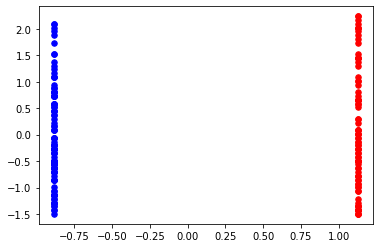

In [14]:
def dbscan(X, eps, min_points):

    cluster_id = 1
    n_points = X.shape[0]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(0, n_points):
        point = X[point_id,:]
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(X, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

X
eps = 2
min_points = 5
y_pred  = dbscan(X, eps,min_points )


y = np.array(y_pred)



plt.scatter(X[y ==1,0], X[y==1,1], s = 30, c = "red")
plt.scatter(X[y ==None,0], X[y==None,1], s = 30, c = "black")
plt.scatter(X[y ==2,0], X[y==2,1], s = 30, c = "blue")
plt.scatter(X[y ==3,0], X[y==3,1], s = 30, c = "yellow")
plt.scatter(X[y ==4,0], X[y==4,1], s = 30, c = "green")
y


In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score




def dbscan_sonuc():
    
    for i in np.arange(0.5,2.0,0.3):
        
        for j in range(5,10):
            
            y_pred  = np.array(dbscan(X, i,j))

            print("{2} min_points sayısında silhouette_score_{1}:  {0}".format(silhouette_score(X,y_pred, metric='euclidean'),i,j))
            print('{2} min_points sayısında davies_bouldin_score_{1}: {0}'.format(str(davies_bouldin_score(X,y_pred).round(3)),i,j))
            print("-------------------------------------")
"""
plt.scatter(X[y ==0,0], X[y==0,1], s = 20, c = "red")
plt.scatter(X[y ==1,0], X[y==1,1], s = 20, c = "blue")
plt.scatter(X[y ==2,0], X[y==2,1], s = 20, c = "yellow")"""

x = dbscan_sonuc()

5 min_points sayısında silhouette_score_0.5:  0.015661335800635154
5 min_points sayısında davies_bouldin_score_0.5: 1.394
-------------------------------------
6 min_points sayısında silhouette_score_0.5:  -0.09532840161431214
6 min_points sayısında davies_bouldin_score_0.5: 1.82
-------------------------------------
7 min_points sayısında silhouette_score_0.5:  -0.0695061024812725
7 min_points sayısında davies_bouldin_score_0.5: 1.549
-------------------------------------
8 min_points sayısında silhouette_score_0.5:  -0.07543234574553993
8 min_points sayısında davies_bouldin_score_0.5: 1.673
-------------------------------------
9 min_points sayısında silhouette_score_0.5:  -0.1267995868076781
9 min_points sayısında davies_bouldin_score_0.5: 1.641
-------------------------------------
5 min_points sayısında silhouette_score_0.8:  0.17209872109761942
5 min_points sayısında davies_bouldin_score_0.8: 2.736
-------------------------------------
6 min_points sayısında silhouette_score_0.8:

In [11]:
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics import silhouette_score

y_pred  = np.array(dbscan(X, 1.7,5))
    
print("silhouette_score", silhouette_score(X,y_pred, metric='euclidean'))

print('Davies Bouldin Score:'+str(davies_bouldin_score(X,y_pred).round(3)))

silhouette_score 0.2776035125578272
Davies Bouldin Score:1.612


In [12]:
frame = pd.DataFrame(X_df)
frame['cluster'] = y_pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [13]:
avg_df = X_df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,39.806818,62.227273,48.511364
1,2,0,38.098214,59.250000,51.526786


<AxesSubplot:xlabel='cluster', ylabel='Gender'>

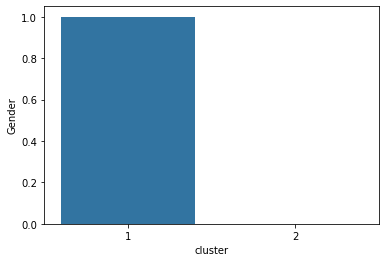

In [16]:
import seaborn as sns
sns.barplot(x='cluster',y='Gender',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Age'>

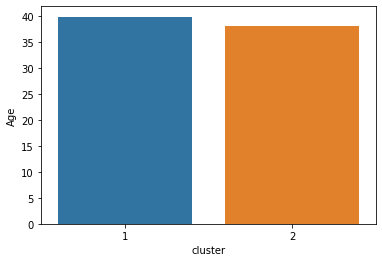

In [17]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

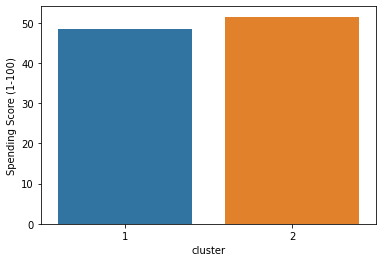

In [18]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

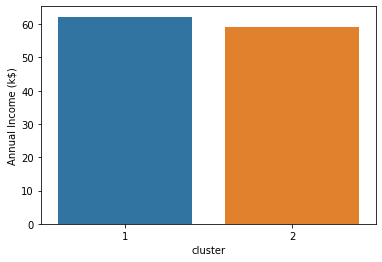

In [19]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)